https://www.kaggle.com/alikmondal/named-entity-recognition-using-rnn

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/FP-KK/dataset/ner_datasetreference.csv'
dataset = pd.read_csv(dataset_path, encoding= 'unicode_escape')
dataset.shape

(1048575, 5)

In [ ]:
dataset.head()

,Sentence #,Word,POS,Tag,Class
0,Sentence: 1,Thousands,NNS,O,0
1,NaN,of,IN,O,0
2,NaN,demonstrators,NNS,O,0
3,NaN,have,VBP,O,0
4,NaN,marched,VBN,O,0


In [ ]:
dataset.drop(['POS'], inplace=True, axis=1)

In [ ]:
dataset["Tag"].value_counts()

O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: Tag, dtype: int64

In [ ]:
dataset.head()

,Sentence #,Word,Tag,Class
0,Sentence: 1,Thousands,O,0
1,NaN,of,O,0
2,NaN,demonstrators,O,0
3,NaN,have,O,0
4,NaN,marched,O,0


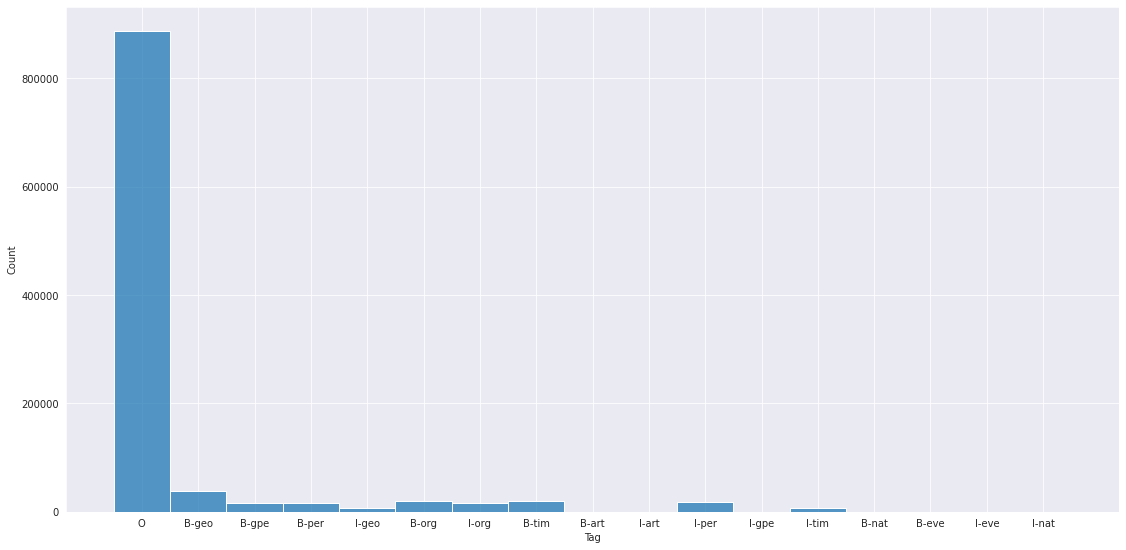

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16,8))
sns.set_style('darkgrid')
sns.histplot(dataset['Tag'])
plt.tight_layout(pad=2)
plt.show()

In [ ]:
from itertools import chain
def get_dict_map(dataset, token_or_tag):
    tok2idx = {}
    idx2tok = {}
    
    if token_or_tag == 'token':
        vocab = list(set(dataset['Word'].to_list()))
    else:
        vocab = list(set(dataset['Tag'].to_list()))
    
    idx2tok = {idx:tok for  idx, tok in enumerate(vocab)}
    tok2idx = {tok:idx for  idx, tok in enumerate(vocab)}
    return tok2idx, idx2tok, vocab

In [ ]:
token2idx, idx2token, word_vocab = get_dict_map(dataset, 'token')
tag2idx, idx2tag, tag_vocab = get_dict_map(dataset, 'tag')

35172
['I-art', 'B-geo', 'I-gpe', 'I-geo', 'I-eve', 'B-art', 'I-org', 'O', 'B-org', 'B-per', 'I-nat', 'B-eve', 'B-tim', 'I-per', 'I-tim', 'B-nat', 'B-gpe', 'ENDPAD']


In [ ]:
# importing the module
import json
 
# Opening JSON file
def loadJSON(filename):
  data = {}
  with open(filename) as json_file:
      data = json.load(json_file)
  return data

In [ ]:
idx2tag = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-KK/output/idx2tag2.json')
tag2idx = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-KK/output/tag2idx2.json')
token2idx = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-KK/output/token2idx2.json')
idx2token = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-KK/output/idx2token2.json')
print(idx2tag)

{'0': 'O', '1': 'I-org', '2': 'B-nat', '3': 'I-eve', '4': 'B-per', '5': 'I-per', '6': 'B-geo', '7': 'B-gpe', '8': 'B-eve', '9': 'I-art', '10': 'B-org', '11': 'I-tim', '12': 'B-art', '13': 'I-gpe', '14': 'I-geo', '15': 'I-nat', '16': 'B-tim', '17': 'ENDPAD'}


In [ ]:
import json
with open("/content/drive/MyDrive/Colab Notebooks/FP-KK/output/token2idx2.json", "w") as outfile:
    json.dump(token2idx, outfile)
with open("/content/drive/MyDrive/Colab Notebooks/FP-KK/output/idx2token2.json", "w") as outfile:
    json.dump(idx2token, outfile)
with open("/content/drive/MyDrive/Colab Notebooks/FP-KK/output/tag2idx2.json", "w") as outfile:
    json.dump(tag2idx, outfile)
with open("/content/drive/MyDrive/Colab Notebooks/FP-KK/output/idx2tag2.json", "w") as outfile:
    json.dump(idx2tag, outfile)

In [ ]:
print(tag2idx)

{'I-geo': 14, 'I-org': 1, 'B-nat': 2, 'I-eve': 3, 'B-per': 4, 'I-per': 5, 'B-geo': 6, 'B-gpe': 7, 'B-eve': 8, 'I-art': 9, 'B-org': 10, 'I-tim': 11, 'B-art': 12, 'I-gpe': 13, 'O': 0, 'I-nat': 15, 'B-tim': 16, 'ENDPAD': 17}


In [ ]:
dataset['Word_idx'] = dataset['Word'].map(token2idx)
dataset['Tag_idx'] = dataset['Tag'].map(tag2idx)
dataset_fillna = dataset.fillna(method='ffill', axis=0)
# Groupby and collect columns
dataset_group = dataset_fillna.groupby(['Sentence #'], as_index=False)['Word', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


Splitting Train Test

In [ ]:
import math
test_size = math.floor(dataset_group.shape[0] * 0.2)
test_size

9591

In [ ]:
data_test_group = dataset_group.iloc[-test_size:]
data_train_group = dataset_group.iloc[:dataset_group.shape[0] - test_size]

In [ ]:
data_test_group.reset_index(drop=True, inplace=True)
data_test_group

,Sentence #,Word,Tag,Word_idx,Tag_idx
0,Sentence: 4453,"[In, line, with, IMF, conditions, ,, in, 2009,...","[O, O, O, B-org, O, O, O, B-tim, O, B-org, O, ...","[30235, 27488, 8856, 12526, 9511, 14320, 7258,...","[0, 0, 0, 10, 0, 0, 0, 16, 0, 10, 0, 0, 0, 0, ..."
1,Sentence: 44530,"[He, called, for, research, on, hybrid, automo...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[22908, 28590, 12209, 3234, 29279, 29618, 9023...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Sentence: 44531,"[The, president, said, new, technologies, will...","[O, O, O, O, O, O, O, O, B-geo, I-geo, O, O, O...","[20005, 3610, 433, 2083, 33128, 8970, 892, 389...","[0, 0, 0, 0, 0, 0, 0, 0, 6, 14, 0, 0, 0, 0, 0,..."
3,Sentence: 44532,"[The, U.S., military, says, it, is, searching,...","[O, B-geo, O, O, O, O, O, O, O, O, O, O, O, B-...","[20005, 2250, 28906, 14379, 6314, 14064, 26378...","[0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, ..."
4,Sentence: 44533,"[The, team, vanished, just, before, a, helicop...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[20005, 3986, 29689, 30649, 24475, 28550, 2926...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
9586,Sentence: 9995,"[Opposition, leader, Mir, Hossein, Mousavi, ha...","[O, O, O, B-per, I-per, O, O, O, O, O, O, O, O...","[5220, 20303, 16135, 20188, 7400, 5052, 433, 2...","[0, 0, 0, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9587,Sentence: 9996,"[On, Thursday, ,, Iranian, state, media, publi...","[O, B-tim, O, B-gpe, O, O, O, O, O, O, O, O, B...","[30778, 5799, 14320, 34424, 11155, 14159, 3380...","[0, 16, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 10, 1, 0..."
9588,Sentence: 9997,"[Following, Iran, 's, disputed, June, 12, elec...","[O, B-geo, O, O, B-tim, I-tim, O, O, O, O, O, ...","[25319, 16791, 13786, 9547, 33484, 30, 22059, ...","[0, 6, 0, 0, 16, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
9589,Sentence: 9998,"[Since, then, ,, authorities, have, held, publ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[27191, 14187, 14320, 20885, 367, 23014, 7, 64...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
data_train_group.reset_index(drop=True, inplace=True)
data_train_group

,Sentence #,Word,Tag,Word_idx,Tag_idx
0,Sentence: 1,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[28285, 15741, 1523, 367, 13632, 7168, 25967, ...","[0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 6, 0, 0, ..."
1,Sentence: 10,"[Iranian, officials, say, they, expect, to, ge...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[34424, 1990, 32928, 9794, 31792, 34610, 15641...","[7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Sentence: 100,"[Helicopter, gunships, Saturday, pounded, mili...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...","[28347, 29190, 19208, 2838, 24041, 26531, 7258...","[0, 0, 16, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 10..."
3,Sentence: 1000,"[They, left, after, a, tense, hour-long, stand...","[O, O, O, O, O, O, O, O, O, O, O]","[4139, 30932, 1336, 28550, 18536, 21258, 26975...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,Sentence: 10000,"[U.N., relief, coordinator, Jan, Egeland, said...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo...","[30896, 25325, 14734, 12754, 18505, 433, 7325,...","[6, 0, 0, 4, 5, 0, 16, 0, 6, 0, 7, 0, 7, 0, 0,..."
...,...,...,...,...,...
38363,Sentence: 44525,"[President, Bush, called, on, the, United, Sta...","[B-per, I-per, O, O, O, B-geo, I-geo, O, O, O,...","[344, 19638, 28590, 29279, 3894, 18510, 6565, ...","[4, 5, 0, 0, 0, 6, 14, 0, 0, 0, 0, 0, 0, 0, 0,..."
38364,Sentence: 44526,"[Mr., Bush, said, dependence, on, foreign, sou...","[B-per, I-per, O, O, O, O, O, O, O, O, B-geo, ...","[188, 19638, 433, 7527, 29279, 11236, 5495, 15...","[4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, ..."
38365,Sentence: 44527,"[The, president, called, for, reducing, gasoli...","[O, O, O, O, O, O, O, O, O, B-geo, O, O, O, B-...","[20005, 3610, 28590, 12209, 28521, 30306, 3119...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 16, 0,..."
38366,Sentence: 44528,"[He, said, the, goal, can, be, met, by, increa...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[22908, 433, 3894, 32462, 14067, 26107, 19184,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Build ulang Data Frame dan export ke CSV

In [ ]:
def buildDataFrame(groupedData):
  word_list = []
  tag_list = []
  word_idx = []
  tag_idx = []
  sentence_list = []
  for sentence in range(0, groupedData.shape[0]):
    sentence_array = [groupedData.loc[sentence, 'Sentence #']] * len(groupedData.loc[sentence, 'Word'])
    sentence_list = sentence_list + sentence_array
    word_list = word_list + groupedData.loc[sentence, 'Word']
    tag_list = tag_list + groupedData.loc[sentence, 'Tag']
    word_idx = word_idx + groupedData.loc[sentence, 'Word_idx']
    tag_idx = tag_idx + groupedData.loc[sentence, 'Tag_idx']
    # print(sentence_list, word_list, tag_list)
  dataFrame = pd.DataFrame({'Sentence #': sentence_list, 'Word': word_list, 'Tag': tag_list, 'Word_idx': word_idx, 'Tag_idx': tag_idx})
  # return sentence_list, word_list, tag_list
  return dataFrame

In [ ]:
train_df =  buildDataFrame(data_train_group)
train_df

,Sentence #,Word,Tag,Word_idx,Tag_idx
0,Sentence: 1,Thousands,O,28285,0
1,Sentence: 1,of,O,15741,0
2,Sentence: 1,demonstrators,O,1523,0
3,Sentence: 1,have,O,367,0
4,Sentence: 1,marched,O,13632,0
...,...,...,...,...,...
839810,Sentence: 44529,as,O,21619,0
839811,Sentence: 44529,alternatives,O,21279,0
839812,Sentence: 44529,to,O,34610,0
839813,Sentence: 44529,oil,O,23416,0


In [ ]:
test_df =  buildDataFrame(data_test_group)
test_df

,Sentence #,Word,Tag,Word_idx,Tag_idx
0,Sentence: 4453,In,O,30235,0
1,Sentence: 4453,line,O,27488,0
2,Sentence: 4453,with,O,8856,0
3,Sentence: 4453,IMF,B-org,12526,10
4,Sentence: 4453,conditions,O,9511,0
...,...,...,...,...,...
208755,Sentence: 9999,weight,O,28563,0
208756,Sentence: 9999,in,O,7258,0
208757,Sentence: 9999,gold,O,1317,0
208758,Sentence: 9999,.,O,13264,0


Export ke csv untuk digunakan membangun model klasifikasi

In [ ]:
train_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FP-KK/dataset/train_baseline_fix_index.csv')

In [ ]:
test_df.to_csv('/content/drive/MyDrive/Colab Notebooks/FP-KK/dataset/test_baseline_fix_index.csv')

In [ ]:
merged_df = train_df.append([test_df])

In [ ]:
import math
split_size = math.floor(merged_df.shape[0] * 0.5)
split_size

In [ ]:
train1 = merged_df.iloc[-split_size:]
train2 = merged_df.iloc[:merged_df.shape[0] - split_size]

In [ ]:
train1.to_csv('/content/drive/MyDrive/Colab Notebooks/FP-KK/dataset/merged_baseline_1.csv')
train2.to_csv('/content/drive/MyDrive/Colab Notebooks/FP-KK/dataset/merged_baseline_2.csv')